# This notebook is for AWS instances

In [1]:
#!pip install scipy
import tensorflow as tf
import matplotlib.image as img
import numpy as np
import os
import matplotlib.pyplot as plt
import shutil
#from tensorflow.keras.preprocessing import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy
#Image flow from directory, data image gen
#from skimage import io, color, filters
#from skimage.transform import resize, rotate
print(tf.__version__)
print(tf.test.gpu_device_name())
#!pip install tensorflow_datasets
!nvidia-smi

2.3.1
/device:GPU:0
Fri Dec  4 04:31:33 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.80.02    Driver Version: 450.80.02    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   62C    P0    31W /  70W |    619MiB / 15109MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                    

In [11]:
# run this only one time 
def test_split(rootdir):
    root_dir = rootdir
    """
    # train dirs
    for food in os.listdir(os.path.join(root_dir,'images')):
        os.makedirs(root_dir +'/train/' + food)
    # test dirs
    for food in os.listdir(os.path.join(root_dir,"images")):
        os.makedirs(root_dir + "/test/" + food)
    # var dirs
    for food in os.listdir(os.path.join(root_dir,"images")):
        os.makedirs(root_dir + "/var/" + food)
    """
    food_names = os.listdir(os.path.join(root_dir,'images'))
    for food in food_names:
        currentCls = food
        src = os.path.join(root_dir,'images',currentCls) # Folder to copy images from

        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])

        train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
        val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
        test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
        
        print('Total images: ', len(allFileNames))
        print('Training: ', len(train_FileNames))
        print('Validation: ', len(val_FileNames))
    
        for name in train_FileNames:
            shutil.copy(name, root_dir+"/train/"+currentCls)

        for name in val_FileNames:
            shutil.copy(name, root_dir+"/var/"+currentCls)

        for name in test_FileNames:
            shutil.copy(name, root_dir+"/test/"+currentCls)
            
            

#print(test_split('../data'))
    
    

Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images

In [2]:
labels_all= '''apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito
bruschetta
caesar_salad
cannoli
caprese_salad
carrot_cake
ceviche
cheesecake
cheese_plate
chicken_curry
chicken_quesadilla
chicken_wings
chocolate_cake
chocolate_mousse
churros
clam_chowder
club_sandwich
crab_cakes
creme_brulee
croque_madame
cup_cakes
deviled_eggs
donuts
dumplings
edamame
eggs_benedict
escargots
falafel
filet_mignon
fish_and_chips
foie_gras
french_fries
french_onion_soup
french_toast
fried_calamari
fried_rice
frozen_yogurt
garlic_bread
gnocchi
greek_salad
grilled_cheese_sandwich
grilled_salmon
guacamole
gyoza
hamburger
hot_and_sour_soup
hot_dog
huevos_rancheros
hummus
ice_cream
lasagna
lobster_bisque
lobster_roll_sandwich
macaroni_and_cheese
macarons
miso_soup
mussels
nachos
omelette
onion_rings
oysters
pad_thai
paella
pancakes
panna_cotta
peking_duck
pho
pizza
pork_chop
poutine
prime_rib
pulled_pork_sandwich
ramen
ravioli
red_velvet_cake
risotto
samosa
sashimi
scallops
seaweed_salad
shrimp_and_grits
spaghetti_bolognese
spaghetti_carbonara
spring_rolls
steak
strawberry_shortcake
sushi
tacos
takoyaki
tiramisu
tuna_tartare
waffles'''
user_words = labels_all
word_list = user_words.split()
user_words = []
for word in word_list:
    user_words.append(word)
user_words = " ".join(user_words)
class_labels = user_words.split()

Found 70700 images belonging to 101 classes.
Found 15150 images belonging to 101 classes.
Found 15150 images belonging to 101 classes.
These waffles have been: height_shift_range=0.5,shear_range=0.2, zoom_range=0.2, horizontal_flip=True


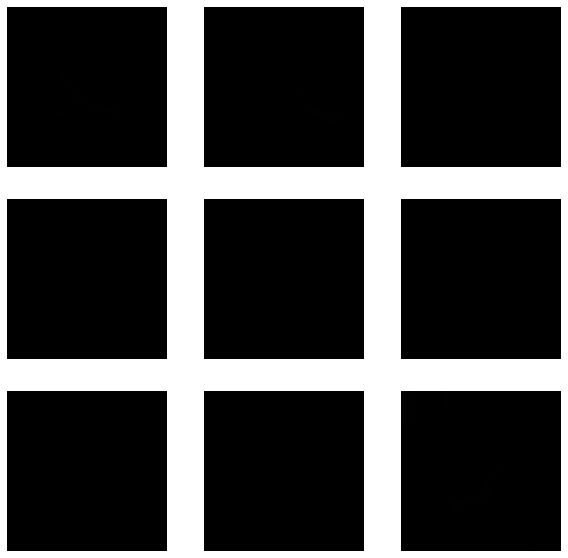

In [50]:
# making 101 classes

# agumentations (rotation_range=90, rescale=1./255,rotation_range=90,height_shift_range=0.5,shear_range=0.1, zoom_range=0.1, horizontal_flip=True))

X5_train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=10,
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness)
X5_test_datagen = ImageDataGenerator(rescale=1./255)
X5_var_datagen = ImageDataGenerator(rescale=1./255)

labels_5 = ['apple_pie','waffles','gnocchi','chocolate_mousse','baklava']

X5_train = X5_train_datagen.flow_from_directory(
    '../data/train/',
    target_size=(256,256),
    color_mode="rgb",
    classes=class_labels,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)

X5_test = X5_test_datagen.flow_from_directory(
    '../data/test/',
    target_size=(256,256),
    color_mode="rgb",
    classes=class_labels,
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)
X5_var = X5_var_datagen.flow_from_directory(
    '../data/var/',
    target_size=(256,256),
    color_mode="rgb",
    classes=class_labels,
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)

print('These waffles have been: height_shift_range=0.5,shear_range=0.2, zoom_range=0.2, horizontal_flip=True')
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
# load the image
img = load_img('../data/train_mini/waffles/1005755.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
#datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = X5_train_datagen.flow(samples, batch_size=1)
# generate samples and plot
pyplot.title(label='These waffles have bee height_shift_range=0.5,shear_range=0.2, zoom_range=0.2, horizontal_flip=True')
for i in range(9):
    # define subplot
    pyplot.subplot( 330 +1 +i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.minorticks_off()
    pyplot.imshow(image)
    pyplot.axis('off')
    
# show the figure only when resample 1./255 is off
pyplot.show()

# Tensorflow cnn with all 101 classes

In [2]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
# Getting logs file ready for tensorboard
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True, monitor = 'val_loss') 
checkpoint_filepath = './aws/my_5classmodel.h5'
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [4]:
tensorboard dev upload --logdir \
    './my_logs'

# Tensor Model with 101 Classes to be run for 12 hours. 

In [24]:
# Tensor model
num_classes = 5
input_shape=[256,256,3]

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=input_shape),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


Model flattened out to  (None, 802816)
Epoch 1/100
   1/2209 [..............................] - ETA: 0s - loss: 32.5833 - accuracy: 0.0000e+00WARNING:tensorflow:From /home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/gpu_cuda11.0/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
  13/2209 [..............................] - ETA: 15:41 - loss: 1482.2579 - accuracy: 0.0120

KeyboardInterrupt: 

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 256, 256, 64)      9280      
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
activation_2 (Activation)    (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 64)     

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Test score: 1.2974377870559692
Test accuracy: 0.4553571343421936


In [8]:
X5_test.reset()
predIdxs = history.predict(x=X5_test,
    steps=(750 // 32) + 1)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(X5_test.classes, predIdxs,
    target_names=X5_test.class_indices.keys()))



In [9]:
score = model.evaluate(X5_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]) # this is the one we care about

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0

In [10]:
# loading saved model 
name = keras.models.load_model('./aws/my_101classmodel.h5')
predictions_ = name.predict(X5_test)


In [11]:
print()
X5_test.reset()
predIdxs = modelw.predict(x=X5_test,
	steps=(750 // 32) + 1)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(X5_test.classes, predIdxs,
	target_names=X5_test.class_indices.keys()))


Epoch 1/100
2209/2209 [==============================] - 1276s 578ms/step - loss: 4.4430 - accuracy: 0.0334 - val_loss: 4.2244 - val_accuracy: 0.0663
Epoch 2/100
2209/2209 [==============================] - 1278s 579ms/step - loss: 4.1203 - accuracy: 0.0765 - val_loss: 3.9060 - val_accuracy: 0.1052
Epoch 3/100
2209/2209 [==============================] - 1271s 575ms/step - loss: 3.8772 - accuracy: 0.1113 - val_loss: 3.7211 - val_accuracy: 0.1347
Epoch 4/100
2209/2209 [==============================] - 1275s 577ms/step - loss: 3.7338 - accuracy: 0.1339 - val_loss: 3.5636 - val_accuracy: 0.1615
Epoch 5/100
2209/2209 [==============================] - 1263s 572ms/step - loss: 3.6169 - accuracy: 0.1548 - val_loss: 3.5551 - val_accuracy: 0.1683
Epoch 6/100
2209/2209 [==============================] - 1279s 579ms/step - loss: 3.5273 - accuracy: 0.1693 - val_loss: 3.4710 - val_accuracy: 0.1841
Epoch 7/100
2209/2209 [==============================] - 1281s 580ms/step - loss: 3.4557 - accuracy:

KeyboardInterrupt: 

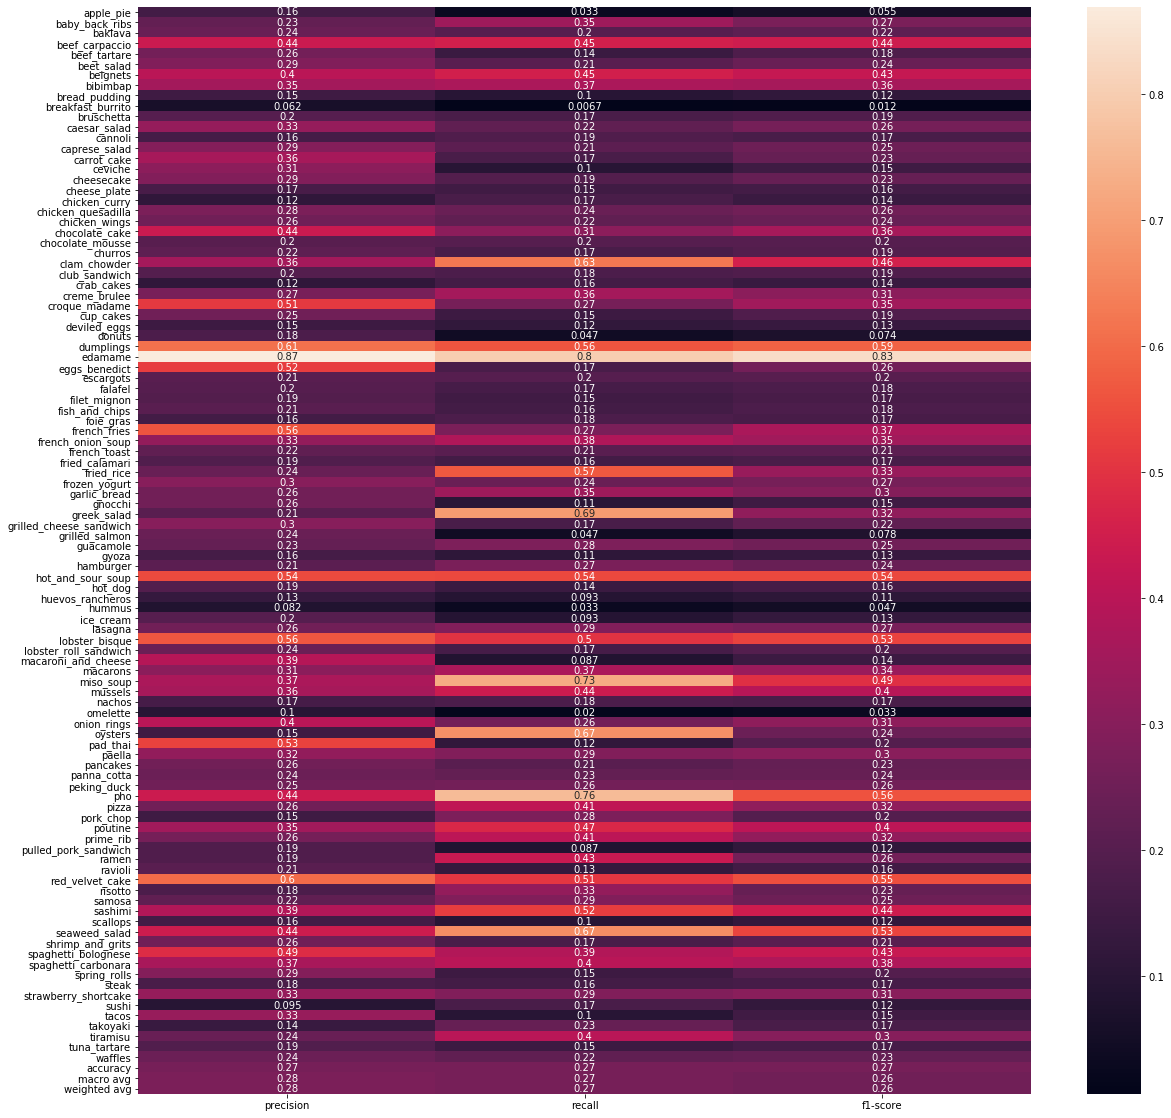

In [38]:
fig, ax = plt.subplots(figsize=(20,20))  
clf_report= classification_report(X5_test.classes, predIdxs,
	target_names=X5_test.class_indices.keys(), output_dict=True)

sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,ax=ax)

In [52]:
top1 = 0.0
top5 = 0.0    
class_probs = model.predict(X5_test)
for i, l in enumerate(X5_test.classes):
    class_prob = class_probs[i]
    top_values = (-class_prob).argsort()[:5]
    if top_values[0] == l:
        top1 += 1.0
    if np.isin(np.array([l]), top_values):
        top5 += 1.0
print('Basic Model')
print("top1 acc", top1/len(X5_test.classes))
print("top5 acc", top5/len(X5_test.classes))


Basic Model
top1 acc 0.26858085808580856
top5 acc 0.5592079207920793


# Set up for Transfer Learning

In [1]:
# making all images 224 for Transfer learning models

# agumentations (rotation_range=90, rescale=1./255,rotation_range=90,height_shift_range=0.5,shear_range=0.1, zoom_range=0.1, horizontal_flip=True))
labels_all= '''apple_pie`
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito
bruschetta
caesar_salad
cannoli
caprese_salad
carrot_cake
ceviche
cheesecake
cheese_plate
chicken_curry
chicken_quesadilla
chicken_wings
chocolate_cake
chocolate_mousse
churros
clam_chowder
club_sandwich
crab_cakes
creme_brulee
croque_madame
cup_cakes
deviled_eggs
donuts
dumplings
edamame
eggs_benedict
escargots
falafel
filet_mignon
fish_and_chips
foie_gras
french_fries
french_onion_soup
french_toast
fried_calamari
fried_rice
frozen_yogurt
garlic_bread
gnocchi
greek_salad
grilled_cheese_sandwich
grilled_salmon
guacamole
gyoza
hamburger
hot_and_sour_soup
hot_dog
huevos_rancheros
hummus
ice_cream
lasagna
lobster_bisque
lobster_roll_sandwich
macaroni_and_cheese
macarons
miso_soup
mussels
nachos
omelette
onion_rings
oysters
pad_thai
paella
pancakes
panna_cotta
peking_duck
pho
pizza
pork_chop
poutine
prime_rib
pulled_pork_sandwich
ramen
ravioli
red_velvet_cake
risotto
samosa
sashimi
scallops
seaweed_salad
shrimp_and_grits
spaghetti_bolognese
spaghetti_carbonara
spring_rolls
steak
strawberry_shortcake
sushi
tacos
takoyaki
tiramisu
tuna_tartare
waffles'''
user_words = labels_all
word_list = user_words.split()
user_words = []
for word in word_list:
    user_words.append(word)
user_words = " ".join(user_words)
class_labels = user_words.split()

tiny_20 = ['french_toast', 'lobster_bisque', 'cup_cakes', 'carrot_cake',
       'garlic_bread', 'bruschetta', 'chicken_wings', 'cheesecake',
       'samosa', 'tiramisu', 'deviled_eggs', 'french_fries',
       'beef_carpaccio', 'spring_rolls', 'club_sandwich', 'donuts',
       'breakfast_burrito', 'filet_mignon', 'caprese_salad', 'tiramisu']

X5_train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,horizontal_flip=True,fill_mode="nearest") # brightness)
X5_test_datagen = ImageDataGenerator(rescale=1./255)
X5_var_datagen = ImageDataGenerator(rescale=1./255)

labels_5 = ['apple_pie','waffles','gnocchi','chocolate_mousse','baklava']

X5_train = X5_train_datagen.flow_from_directory(
    '../data/train/',
    target_size=(224,224),
    color_mode="rgb",
    classes=class_labels,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)

X5_test = X5_test_datagen.flow_from_directory(
    '../data/test/',
    target_size=(224,224),
    color_mode="rgb",
    classes=class_labels,
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)
X5_var = X5_var_datagen.flow_from_directory(
    '../data/var/',
    target_size=(224,224),
    color_mode="rgb",
    classes=class_labels,
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)


NameError: name 'ImageDataGenerator' is not defined

In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [8]:
# importing the libraries

#from keras.preprocessing import image

IMAGE_SIZE = [224, 224]  # we will keep the image size as (64,64). You can increase the size for better results. 
num_classes = 101
# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as required by VGG

# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(128, activation = 'relu')(x)  
x = Dense(num_classes, activation = 'softmax')(x)  

model = Model(inputs = vgg.input, outputs = x)

optimizer = keras.optimizers.SGD(lr=0.1, momentum=0.9, decay=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

checkpoint = ModelCheckpoint(filepath='./aws/VGG16model.h5', 
                               verbose=1, save_best_only=True)

callbacks = [checkpoint] # lr_reducer



model.summary()


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [80]:
start = datetime.now()

history = model.fit_generator(X5_train, 
                    steps_per_epoch=70700//32, 
                    epochs = 50, verbose=1, 
                    validation_data = X5_var, 
                    validation_steps = 15150//32,
                             callbacks=callbacks)

duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/50
2209/2209 [==============================] - ETA: 0s - loss: 4.7682 - accuracy: 0.0085
Epoch 00001: val_loss improved from inf to 4.61514, saving model to ./aws/mydeepmodel.h5
2209/2209 [==============================] - 943s 427ms/step - loss: 4.7682 - accuracy: 0.0085 - val_loss: 4.6151 - val_accuracy: 0.0099
Epoch 2/50
2209/2209 [==============================] - ETA: 0s - loss: 4.6156 - accuracy: 0.0087
Epoch 00002: val_loss improved from 4.61514 to 4.61511, saving model to ./aws/mydeepmodel.h5
2209/2209 [==============================] - 940s 426ms/step - loss: 4.6156 - accuracy: 0.0087 - val_loss: 4.6151 - val_accuracy: 0.0099
Epoch 3/50
2209/2209 [==============================] - ETA: 0s - loss: 4.6154 - accuracy: 0.0086
Epoch 00003: val_loss did not improve from 4.61511
2209/2209 [==============================] - 941s 426ms/step - loss: 4.6154 - accuracy: 0.0086 - val_loss: 4.6151 - val_accuracy: 0.0099
Epoch 4/50
2209/2209 [==============================] - ETA: 0

KeyboardInterrupt: 

In [29]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

 
X5_test.reset()
predIdxs = model.predict(x=X5_test,
	steps=(750 // 32) + 1)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(X5_test.classes, predIdxs,
	target_names=X5_test.class_indices.keys()))


# reset the testing generator and evaluate the network after
# fine-tuning just the network head
print("evaluating after tuning head")
X5_test.reset()
predIdxs = model.predict(x=X5_test,
	steps=(750 // 32) + 1)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(X5_test.classes, predIdxs,
	target_names=X5_test.class_indices.keys()))

[INFO] evaluating after fine-tuning network head...
                  precision    recall  f1-score   support

       apple_pie       0.49      0.43      0.46       150
         waffles       0.65      0.69      0.67       150
         gnocchi       0.71      0.93      0.80       150
chocolate_mousse       0.80      0.65      0.72       150
         baklava       0.74      0.67      0.70       150

        accuracy                           0.67       750
       macro avg       0.68      0.67      0.67       750
    weighted avg       0.68      0.67      0.67       750



# Training the bottom couple of conv layers by unfreezing them

In [30]:
# reset our data generators
X5_test.reset()
X5_var.reset()
# now that the head FC layers have been trained/initialized, lets
# unfreeze the final set of CONV layers and make them trainable
for layer in baseModel.layers[15:]:
	layer.trainable = True
# loop over the layers in the model and show which ones are trainable
for layer in baseModel.layers:
	print("{}: {}".format(layer, layer.trainable))

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f86684afb90>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f86684af990>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f86686b8e10>: False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f862c7a22d0>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f862c780610>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f862c726b50>: False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f862c73a5d0>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f862c72dbd0>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f862c6bef10>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f862c6c3990>: False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f862c6cca50>: False
<tensorflow.python.keras.layers.convolutional.Conv2D

In [31]:
# for the changes to the model to take affect we need to recompile
# the model, this time using SGD with a *very* small learning rate
print("re-compiling model")
optimizer = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9, decay=0.01)
model.compile(loss="categorical_crossentropy", optimizer=optimizer,
	metrics=["accuracy"])
# train the model again, this time fine-tuning *both* the final set
# of CONV layers along with our set of FC layers

history = model.fit_generator(X5_train, 
                    steps_per_epoch=3500//32, 
                    epochs = 10, verbose=1, 
                    validation_data = X5_var, 
                    validation_steps = 700//2,
                             )

[INFO] re-compiling model...
Epoch 1/10
109/109 [==============================] - 50s 460ms/step - loss: 5.9018 - accuracy: 0.2027 - val_loss: 1.6171 - val_accuracy: 0.2000
Epoch 2/10
109/109 [==============================] - 47s 434ms/step - loss: 1.6267 - accuracy: 0.2001
Epoch 3/10
109/109 [==============================] - 47s 433ms/step - loss: 1.6134 - accuracy: 0.1990
Epoch 4/10
109/109 [==============================] - 47s 433ms/step - loss: 1.6119 - accuracy: 0.1987
Epoch 5/10
109/109 [==============================] - 47s 434ms/step - loss: 1.6109 - accuracy: 0.1990
Epoch 6/10
109/109 [==============================] - 47s 434ms/step - loss: 1.6103 - accuracy: 0.2001
Epoch 7/10
109/109 [==============================] - 47s 431ms/step - loss: 1.6100 - accuracy: 0.1935
Epoch 8/10
109/109 [==============================] - 47s 432ms/step - loss: 1.6098 - accuracy: 0.2001
Epoch 9/10
109/109 [==============================] - 47s 433ms/step - loss: 1.6097 - accuracy: 0.2007
Ep

In [40]:
# reset the testing generator and then use our trained model to
# make predictions on the data
print("evaluating after tuning network")
X5_test.reset()
predIdxs = model.predict(x=X5_test,
	steps=(750 // 32) + 1)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(X5_test.classes, predIdxs,
	target_names=X5_test.class_indices.keys()))
print("serializing network")
model.save(config.MODEL_PATH, save_format="h5")

[INFO] evaluating after fine-tuning network...


ValueError: Found input variables with inconsistent numbers of samples: [15150, 768]

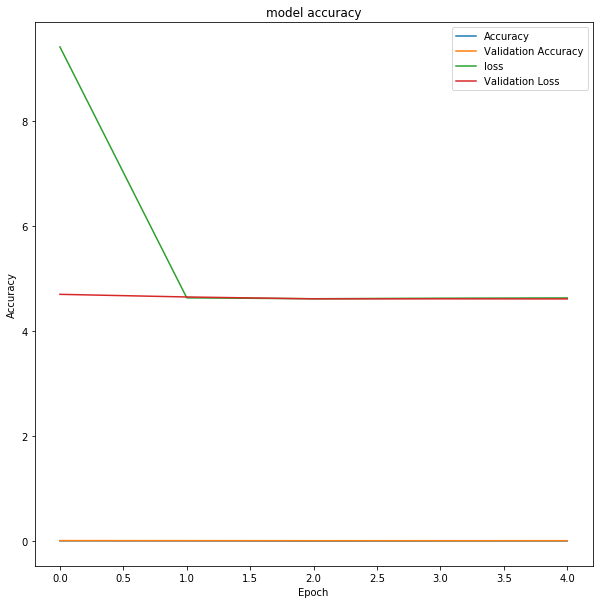

In [38]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

# VGG16 model sucks for this dataset. Moving on to Xception pre-trained model 

In [11]:
base_model = keras.applications.xception.Xception(weights="imagenet",
    include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(101, activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

for layer in base_model.layers:
    layer.trainable = False

optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="categorical_crossentropy", optimizer=optimizer,
metrics=["accuracy"])
            

model.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [12]:
start = datetime.now()

checkpoint = ModelCheckpoint(filepath='./aws/myxceptionmodel.h5', 
                               verbose=1, save_best_only=True)

history1 = model.fit_generator(X5_train, 
                    steps_per_epoch=70700//32, 
                    epochs = 15, verbose=1, 
                    validation_data = X5_var, 
                    validation_steps = 15150//32,
                             callbacks=checkpoint)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
2209/2209 [==============================] - ETA: 0s - loss: 2.5333 - accuracy: 0.4377
Epoch 00001: val_loss improved from inf to 1.88936, saving model to ./aws/myxceptionmodel.h5
2209/2209 [==============================] - 949s 430ms/step - loss: 2.5333 - accuracy: 0.4377 - val_loss: 1.8894 - val_accuracy: 0.5284
Epoch 2/15
2209/2209 [==============================] - ETA: 0s - loss: 1.8454 - accuracy: 0.5333
Epoch 00002: val_loss improved from 1.88936 to 1.80538, saving model to ./aws/myxceptionmodel.h5
2209/2209 [==============================] - 952s 431ms/step - loss: 1.8454 - accuracy: 0.5333 - val_loss: 1.8054 - val_accuracy: 0.5455
Epoch 3/15
2209/2209 [==============================] - ETA: 0s - loss: 1.7754 - accuracy: 0.5468
Epoch 00003: val_loss improved from 1.80538 to 1.77699, saving model to ./aws/myxceptionmodel.h5
2209/2209 [==============================] - 949s 430ms/step - loss: 

In [26]:
top1 = 0.0
top5 = 0.0    
class_probs = model.predict(X5_test)
for i, l in enumerate(X5_test.classes):
    class_prob = class_probs[i]
    top_values = (-class_prob).argsort()[:5]
    if top_values[0] == l:
        top1 += 1.0
    if np.isin(np.array([l]), top_values):
        top5 += 1.0
print('Basic Model')
print("top1 acc", top1/len(X5_test.classes))
print("top5 acc", top5/len(X5_test.classes))


Basic Model
top1 acc 0.5686468646864686
top5 acc 0.8239603960396039


# In the intrest of time instead of slowly un-freezing the models layers I'm going to unfreeze them all since I'm already getting impresive scores. 

In [60]:
from tensorflow import keras
from tensorflow.keras.models import load_model

# unfreezing all layers
frozen_model = load_model("./aws/myxceptionmodel.h5")
for layer in frozen_model.layers:
    layer.trainable = True

from tensorflow.keras.callbacks import History 
history_cb = History()
checkpoint2 = ModelCheckpoint(filepath='./aws/myxceptionmodelunfrozen2.h5', 
                               verbose=1, save_best_only=False)
# lowering learning rate as to not quickly untrain the whole model
#model = load_model("./aws/myxceptionmodelunfrozen.h5")
optimizer = keras.optimizers.SGD(lr=0.1, momentum=0.9, decay=0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer,
metrics=["accuracy"])



In [61]:
model.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [62]:
history2 = model.fit(X5_train, 
                    steps_per_epoch=70700//32, 
                    epochs = 10, verbose=1, 
                    validation_data = X5_var, 
                    validation_steps = 15150//32,callbacks=[checkpoint2,history_cb])

Epoch 1/10
2209/2209 [==============================] - ETA: 0s - loss: 1.1355 - accuracy: 0.6949
Epoch 00001: saving model to ./aws/myxceptionmodelunfrozen2.h5
2209/2209 [==============================] - 1476s 668ms/step - loss: 1.1355 - accuracy: 0.6949 - val_loss: 1.0669 - val_accuracy: 0.7295
Epoch 2/10
2209/2209 [==============================] - ETA: 0s - loss: 0.6622 - accuracy: 0.8159
Epoch 00002: saving model to ./aws/myxceptionmodelunfrozen2.h5
2209/2209 [==============================] - 1438s 651ms/step - loss: 0.6622 - accuracy: 0.8159 - val_loss: 0.9794 - val_accuracy: 0.7542
Epoch 3/10
2209/2209 [==============================] - ETA: 0s - loss: 0.4717 - accuracy: 0.8639
Epoch 00003: saving model to ./aws/myxceptionmodelunfrozen2.h5
2209/2209 [==============================] - 1438s 651ms/step - loss: 0.4717 - accuracy: 0.8639 - val_loss: 0.9779 - val_accuracy: 0.7665
Epoch 4/10
2209/2209 [==============================] - ETA: 0s - loss: 0.3544 - accuracy: 0.8972
Epoch

In [73]:
for layer in frozen_model.layers:
	print("{}: {}".format(layer, layer.trainable))

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f4c5468aa10>: True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4c5468af50>: True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f4c54690690>: True
<tensorflow.python.keras.layers.core.Activation object at 0x7f4c54690d50>: True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4c54690dd0>: True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f4c546955d0>: True
<tensorflow.python.keras.layers.core.Activation object at 0x7f4c5468a990>: True
<tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x7f4c54695c50>: True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f4c546997d0>: True
<tensorflow.python.keras.layers.core.Activation object at 0x7f4c54699d90>: True
<tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x7f4c54699e10>: True
<tensorflow.pyt

In [63]:
top1 = 0.0
top5 = 0.0    
class_probs = model.predict(X5_test)
for i, l in enumerate(X5_test.classes):
    class_prob = class_probs[i]
    top_values = (-class_prob).argsort()[:5]
    if top_values[0] == l:
        top1 += 1.0
    if np.isin(np.array([l]), top_values):
        top5 += 1.0
print('Basic Model')
print("top1 acc", top1/len(X5_test.classes))
print("top5 acc", top5/len(X5_test.classes))


Basic Model
top1 acc 0.7936633663366337
top5 acc 0.9396699669966997


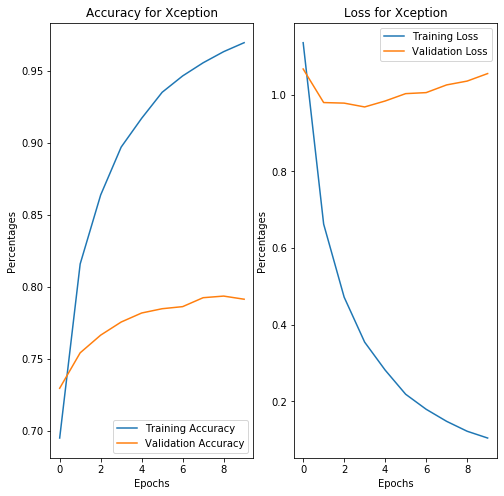

In [70]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel("Epochs")
plt.ylabel("Percentages")
plt.title('Accuracy for Xception')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss for Xception')
plt.xlabel("Epochs")
plt.ylabel("Percentages")
plt.show()


[[ 42   8 100]
 [ 78  18   0]
 [ 72   0  62]
 ...
 [100  21  94]
 [ 31  80   9]
 [100  75  81]]


([array([1451., 1516., 1540., 1537., 1523., 1406., 1528., 1532., 1499.,
         1618.]),
  array([1432., 1521., 1484., 1450., 1707., 1445., 1258., 1407., 1694.,
         1752.]),
  array([1526., 1786., 1434., 1471., 1553., 1424., 1114., 1536., 1783.,
         1523.])],
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 3 Lists of Patches objects>)

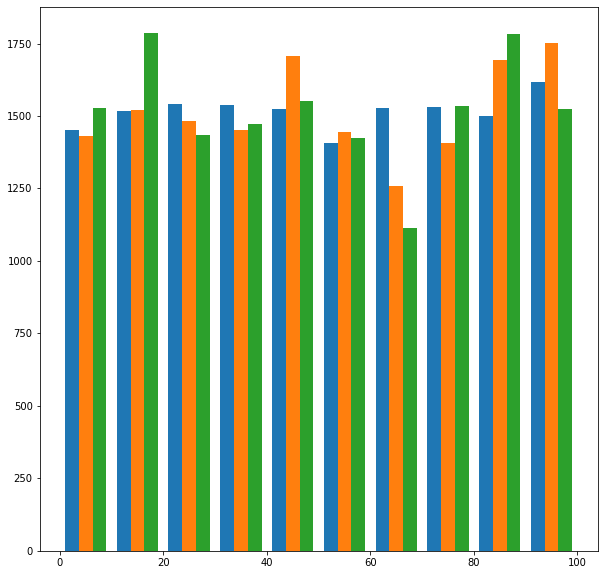

In [75]:
# top 3 of the predictions 
print(np.argsort(class_probs,axis=1)[:,-3:][:,::-1])

fig, ax = plt.subplots()
ax.hist(np.argsort(class_probs,axis=1)[:,-3:][:,::-1])

In [118]:
# predicting on new picitures
hummus_url = "https://thekitchengirl.com/wp-content/uploads/Homemade-Hummus-2.jpg"
hummus_path = tf.keras.utils.get_file('hummus.jpg', origin=hummus_url)

img = keras.preprocessing.image.load_img(
    hummus_path, target_size=(224, 224)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_labels[np.argmax(score)], 100 * np.max(score))
)

81920/77218 [===============================] - 0s 1us/step
This image most likely belongs to cup_cakes with a 2.65 percent confidence.


In [90]:
sunflower_path

'/home/ubuntu/.keras/datasets/sushi.jpg'

In [89]:
suschi_url

'https://rimage.gnst.jp/livejapan.com/public/article/detail/a/00/01/a0001909/img/basic/a0001909_main.jpg?20180711132334&q=80&rw=750&rh=536'

In [98]:
X5_test.labels

array([  0,   0,   0, ..., 100, 100, 100], dtype=int32)

In [113]:
np.array(X5_test.class_indices.keys())

array(dict_keys(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'maca

In [115]:
class_labels

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster